In [16]:
import numpy as np
import pandas as pd

In [18]:
# Read in the data
data = pd.read_csv('CHC_2021/CHC_base_anonimizada09-09-2021.csv')

# delete incomplete surveys
data.dropna(subset=['COMPLETA'], inplace=True)
del data['COMPLETA']

# filter data only including direct interviews
data['entrevista_directa'] = data[['P35', 'P36R', 'P37S1', 'P37S2', 'P37S3', 'P37S4', 'P37S5', 'P37S6', 'P37S7']].sum(axis=1)
data.query('entrevista_directa == 0', inplace=True)
data.reset_index(drop=True, inplace=True)
data.drop(columns=['P35', 'P36R', 'P37S1', 'P37S2', 'P37S3', 'P37S4', 'P37S5', 'P37S6', 'P37S7', 'entrevista_directa'], inplace=True)

# delete columns with irrelevant information
data.drop(columns=[
    'DIRECTORIO', # index
    'TIP_FOR', # survey type
    'P1', # departamento
    'P1S1', # municipio
    'P2', # clase
    'P2S1', # localidad/comuna
    'P5', # lugar de la entrevista
    'CTL_1', # tipo de diligenciamiento
    'P10R', # tipo de documento
    'P11', # municipio de nacimiento
    'P12', # municipio donde duerme actualmente
    'P13', # lugar donde duerme actualmente
    'P17', # enfermedad/accidente ultimos 30 dias
    'P17S1', # lesion, intoxicacion, envenenamiento
    'P17S2', # lesion intencional por terceros
    'P17S3', # problema mental o emocional
    'P17S4', # intento de suicidio
    'P17S5', # tos frecuente
    'P17S6', # otros problemas respiratorios
    'P17S7', # enfermedades de transmision sexual
    'P17S8', # molestias dentales
    'P17S9', # dolor abdominal
    'P17S10', # otros
    'P18', # que hizo para tratar el accidente
    'P19', # lo atendieron?
    'P20', # ha sido diagnosticado con las siguientes enfermedades,
    'P20S1A1', # recibio tratamiento - hipertension
    'P20S2A1', # recibio tratamiento - diabetes
    'P20S3A1', # recibio tratamiento - cancer
    'P20S4A1', # recibio tratamiento - tuberculosis
    'P20S5A1', # recibio tratamiento - VIH/SIDA
    'P21', # en que municipio empezo a vivir en la calle?
    'P23', # ¿Cuánto tiempo lleva usted viviendo en la calle? - sin respuesta
    'P26', # ¿Usted recibe algún tipo de ayuda? - sin respuesta
    'P26_1', # ¿de quién proviene la PRINCIPAL fuente de ayuda que recibe?
    'P26_2S1', # recibe ayuda - economica
    'P26_2S2', # recibe ayuda - alimentaria
    'P26_2S3', # recibe ayuda - alojamiento
    'P26_2S4', # recibe ayuda - psicosocial
    'P26_2S5', # recibe ayuda - formacion y capacitacion
    'P26_2S6', # recibe ayuda - rehabilitacion sustancias psicoactivas
    'P26_2S7', # recibe ayuda - salud
    'P26_2S8', # recibe ayuda - aseo personal,
    'P27', # sabe leer y escribir?
    'P29', # como consigue usted dinero?
    'P30', # ¿usted consume alguna sustancia psicoactiva? - sin respuesta
    'P30_1', # ¿cuál droga consume PRINCIPALMENTE?
    'P30_2', # ¿Cada cuánto consume basuco?
    'P31', # ¿Usted sabe si la alcaldía tiene programas donde se atiende a los habitantes de la calle?
    'P32', # utiliza estos programas?
    'P32S1', # ¿No sabe donde quedan?
    'P32S2', # ¿Quedan lejos?
    'P32S3', # ¿Le solicitan identificación y no tiene?
    'P32S4', # ¿No le permiten ingresar la pipa?
    'P32S5', # ¿No le permiten ingresar sus elementos personales?
    'P32S6', # ¿No le permiten ingresar la mascota?
    'P32S7', # ¿No le gusta?
    'P32S8', # ¿Otra razón?
    'P33', # Su seguridad en la calle se ha visto afectada?
    'P33S1', # Persecución por integrantes de una olla
    'P33S2', # Ser forzado a cumplir con tareas en contra de su voluntad
    'P33S3', # Abuso policial
    'P33S4', # Problemas con grupos juveniles(Barras Bravas, Calvos)
    'P33S5', # Problemas con la comunidad
    'P33S6', # Otra
    'P33_1', # ¿Usted teme por su vida?
    'P33_2', # ¿En los últimos 30 días, usted ha sido víctima de - sin respuesta
    'P33_2S1', # Golpes?
    'P33_2S2', # Disparos?
    'P33_2S3', # Arma blanca?
    'P33_2S4', # Amenazas?
    'P33_2S5' # Insultos?
], inplace=True)

# filter data with non avaliable information
data.dropna(subset=['P16S1', 'P16S2', 'P16S3', 'P16S4', 'P16S5', 'P16S6', 'P16S7', 'P16S8', 'P16S9'], how='all', inplace=True)
# if score = 9, the individual is completely healthy, if not: DISABILITY
data['sano'] = (data[['P16S1', 'P16S2', 'P16S3', 'P16S4', 'P16S5', 'P16S6', 'P16S7', 'P16S8', 'P16S9']] == 4).sum(axis=1)
data.drop(columns=['P16S1', 'P16S2', 'P16S3', 'P16S4', 'P16S5', 'P16S6', 'P16S7', 'P16S8', 'P16S9'], inplace=True)
# data['sano'].replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:1}, inplace=True)
# data['sano'].astype(bool).replace({True: 0, False: 1}, inplace=True)
data['discapacidad'] = (data['sano'] < 9).astype(int)
data.drop(columns=['sano'], inplace=True)

# calculate if the individual has any disease
data['enfermedad'] = (data[['P20S1', 'P20S2', 'P20S3', 'P20S4', 'P20S5']].sum(axis=1) == 10).replace({True: 0, False: 1})
data.drop(columns=['P20S1', 'P20S2', 'P20S3', 'P20S4', 'P20S5'], inplace=True)

# calculate months living in the streets
data['meses_en_calle'] = data['P23S1R'] * 12 + data['P23S2']
data.drop(columns=['P23S1R', 'P23S2'], inplace=True)

# calculate years living in the streets
data['anios_en_calle'] = data['meses_en_calle'] / 12

# determine if the individual has contact with family
data['contacto_familia'] = (data['P25'] == 9).astype(int) # no tiene contacto con la familia
data.drop(columns=['P25'], inplace=True)

# determine if the individual recieves any type of help
data['recibe_ayuda'] = (data[['P26S1', 'P26S2', 'P26S3', 'P26S4', 'P26S5', 'P26S6']].sum(axis=1) == 12).astype(int)
data.drop(columns=['P26S1', 'P26S2', 'P26S3', 'P26S4', 'P26S5', 'P26S6'], inplace=True)

# determine average years of education
data['P28R'].replace({
    1: 2,
    2: 7,
    3: 11,
    4: 13,
    5: 13,
    6: 13,
    7: 15,
    8: 15,
    9: 18
}, inplace=True)
data.rename(columns={'P28R': 'anios_educacion'}, inplace=True)

# determine if the individual has any type of addiction to psychoactive substances
data['consume_drogas'] = (data[['P30S1', 'P30S2',	'P30S3', 'P30S4', 'P30S5', 'P30S6', 'P30S7', 'P30S8', 'P30S9']].sum(axis=1) < 18).astype(int)
data.drop(columns=['P30S1', 'P30S2',	'P30S3', 'P30S4', 'P30S5', 'P30S6', 'P30S7', 'P30S8', 'P30S9'], inplace=True)

# determine the average age of substance consumption
data['edad_promedio_inicio_consumo'] = (data[['P30S1A1R', 'P30S2A1R', 'P30S3A1R', 'P30S4A1R', 'P30S5A1R', 'P30S6A1R', 'P30S7A1R', 'P30S8A1R', 'P30S9A1R']].mean(axis=1)).astype(float)
data['edad_promedio_inicio_consumo'].replace({np.nan: 0}, inplace=True)
data.drop(columns=['P30S1A1R', 'P30S2A1R', 'P30S3A1R', 'P30S4A1R', 'P30S5A1R', 'P30S6A1R', 'P30S7A1R', 'P30S8A1R', 'P30S9A1R'], inplace=True)

# determine if th invididual belongs to the lgbtq+ community
data['P34'].replace({2: 0, 3: 0}, inplace=True)
data['minoria_lgbt'] = (data['P34'] == 0).astype(int)
data.drop(columns=['P34'], inplace=True)


data.rename(columns={
    'P8R': 'edad',
    'P9': 'hombre',
    'P15': 'minoria_raza',
    'P22': 'razon_empezar_calle',
    'P24': 'razon_seguir_calle'
}, inplace=True)

# change gender to binary 0,1
data['hombre'].replace({2: 0}, inplace=True)
data['hombre'] = data['hombre'].astype(int)

# replace minority from 1,2,3,4,5 to 1 and 6 to 0
data['minoria_raza'].replace({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0}, inplace=True)
data['minoria_raza'] = data['minoria_raza'].astype(int)

# drop columns no dummy
data.drop(columns=[
    'razon_empezar_calle',
    'razon_seguir_calle'
], inplace=True)

# Part 2: Bayesian Model

In [23]:
from scipy.stats import invgamma, multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# get log of data for better distribution
data['ln_edad'] = np.log(data['edad'])
data['ln_edad_promedio_inicio_consumo'] = np.log(data['edad_promedio_inicio_consumo'])
data['ln_meses_en_calle'] = np.log(data['meses_en_calle'])
data['ln_anios_en_calle'] = np.log(data['anios_en_calle'])
# replace -inf with 0
data['ln_edad_promedio_inicio_consumo'].replace({-np.inf: 0}, inplace=True)
data['ln_meses_en_calle'].replace({-np.inf: 0}, inplace=True)
data['ln_anios_en_calle'].replace({-np.inf: 0}, inplace=True)

/opt/miniconda3/envs/stats_env/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
data.to_csv('filtered_data.csv', index=False)

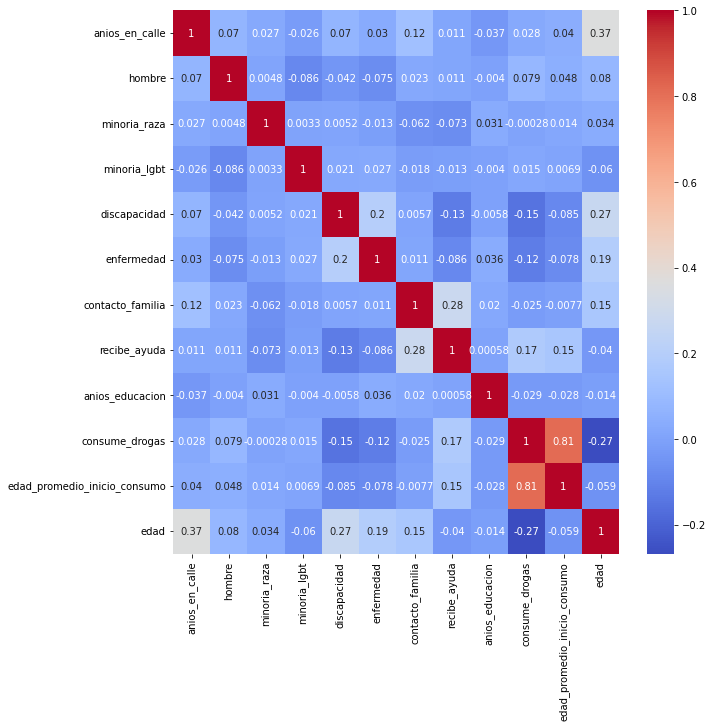

In [28]:
correlations = data[[
    'anios_en_calle',
    'hombre',
    'minoria_raza',
    'minoria_lgbt',
    'discapacidad',
    'enfermedad',
    'contacto_familia',
    'recibe_ayuda',
    'anios_educacion',
    'consume_drogas',
    'edad_promedio_inicio_consumo',
    'edad'
    ]]

# get heatmap of correlations

ax = plt.figure(figsize=(10, 10))
ax = sns.heatmap(correlations.corr(), annot=True, cmap='coolwarm')
plt.show()

# save heatmap
ax.figure.savefig('heatmap.png')